<a href="https://colab.research.google.com/github/PhDenLogica/aguinaldo/blob/main/Aguinaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pérdida de Poder Adquisitivo en el Aguinaldo

In [ ]:
#@title hace click en el boton de play que esta aca abajo a la izquierda, al lado del "mostrar código"
import math

def obtener_float(mensaje, default=0):
    while True:
        print(mensaje + f" (Default: {default}):")
        entrada = input().strip()
        if entrada == "":  # Si el usuario no ingresa nada, usar el valor por defecto
            return float(default)
        try:
            return float(entrada)
        except ValueError:
            print("Error: Ingresa un número válido.")


def obtener_bool(mensaje):
    print(mensaje + " (s/n):")
    entrada = input().strip().lower()
    return entrada == 's'

def calcular_irpf(base_irpf):
    franjas = [
        (0, 46032, 0.00),
        (46033, 65760, 0.10),
        (65761, 98640, 0.15),
        (98641, 197280, 0.24),
        (197281, 328800, 0.25),
        (328801, 493200, 0.27),
        (493201, 756240, 0.31),
        (756241, float('inf'), 0.36)
    ]

    irpf = 0
    for franja in franjas:
        desde, hasta, tasa = franja
        if base_irpf > desde:
            monto_gravable = min(base_irpf, hasta) - desde
            monto_gravable = max(monto_gravable, 0)
            irpf += monto_gravable * tasa
    return round(irpf, 2)

def valor_real_comp(monto_inicial, inflaciones_mensuales, meses):
    inflacion_acumulada = 1
    for i in range(meses):
        inflacion_acumulada *= (1 + inflaciones_mensuales[i])
    return monto_inicial / inflacion_acumulada

def calcular_carga_tributaria():
    print("=== Calculadora de Carga Tributaria ===")

    # Ingresos
    salario_bruto = obtener_float("\nSueldo bruto mensual", 25000)
    aguinaldo_bruto = salario_bruto / 2

    # Configurar inflación mensual
    print("\n--- Configuración de Inflación Mensual ---")
    inflaciones = [
        0.0153,  # Enero
        0.00641, # Febrero
        0.00019, # Marzo
        0.0063,  # Abril
        0.004,   # Mayo
        0.0036,  # Junio
        0.0011,  # Julio
        0.0029,  # Agosto
        0.0037,  # Septiembre
        0.0033,  # Octubre
        0.0036,  # Noviembre
        0.0034   # Diciembre
    ]

    # Información personal
    print("\n--- Información Personal ---")
    porcentaje_fonasa = 0.03

    # Cálculo de descuentos
    irpf_aguinaldo = calcular_irpf(aguinaldo_bruto)
    fonasa_aguinaldo = aguinaldo_bruto * porcentaje_fonasa
    bps_aguinaldo = aguinaldo_bruto * 0.15
    aguinaldo_liquido = aguinaldo_bruto - irpf_aguinaldo - fonasa_aguinaldo - bps_aguinaldo

    # Print de aguinaldo bruto y descuentos
    print(f"\nAguinaldo Bruto: ${aguinaldo_bruto:.2f}")
    print(f"Descuento por BPS: ${bps_aguinaldo:.2f} ({bps_aguinaldo/aguinaldo_bruto*100:.2f}%)")
    print(f"Descuento por IRPF: ${irpf_aguinaldo:.2f} ({irpf_aguinaldo/aguinaldo_bruto*100:.2f}%)")
    print(f"Descuento por FONASA: ${fonasa_aguinaldo:.2f} ({fonasa_aguinaldo/aguinaldo_bruto*100:.2f}%)")

    # Función para calcular valor real mensual vs aguinaldo líquido
    def calcular_perdida(aguinaldo, meses_inicio, meses_fin):
        # Valor real si se pagara mensualmente (1/6 cada mes)
        valor_real_mensual = 0
        for mes in range(meses_inicio-1, meses_fin):
            inflacion_acum = 1
            # Acumulamos la inflación desde el mes actual hasta el mes de cobro del aguinaldo
            for m in range(mes, meses_fin):
                inflacion_acum *= (1 + inflaciones[m])
            valor_real_mensual += (aguinaldo/6) * inflacion_acum

        return valor_real_mensual

    # Cálculos para ambos aguinaldos
    mensual_junio = calcular_perdida(aguinaldo_liquido, 1, 6)  # Enero-Junio
    mensual_diciembre = calcular_perdida(aguinaldo_liquido, 7, 12)  # Julio-Diciembre

    # Calculo porcentaje mensual
    porcentaje_junio = (aguinaldo_liquido - mensual_junio) / aguinaldo_liquido * 100
    porcentaje_diciembre = (aguinaldo_liquido - mensual_diciembre) / aguinaldo_liquido * 100
    porcentaje_total = (aguinaldo_liquido + aguinaldo_liquido - mensual_junio - mensual_diciembre) / (aguinaldo_liquido *2) * 100

    # Resultados
    print(f"\nAguinaldo líquido por pago: ${aguinaldo_liquido:.2f}")
    print("\nAguinaldo de Junio:")
    print(f"- Valor real si se cobra mensualmente: ${mensual_junio:.2f}")
    print(f"- Pérdida del poder adquisitivo: ${aguinaldo_liquido - mensual_junio:.2f} ({porcentaje_junio:.2f}%)")

    print("\nAguinaldo de Diciembre:")
    print(f"- Valor real si se cobra mensualmente: ${mensual_diciembre:.2f}")
    print(f"- Pérdida del poder adquisitivo: ${aguinaldo_liquido - mensual_diciembre:.2f} ({porcentaje_diciembre:.2f}%)")

    print("\nAguinaldo Total:")
    print(f"- Valor real si se cobra mensualmente: ${mensual_junio + mensual_diciembre:.2f}")
    print(f"- Pérdida del poder adquisitivo: ${aguinaldo_liquido + aguinaldo_liquido - mensual_junio - mensual_diciembre:.2f} ({porcentaje_total:.2f}%)")

    # Calcular inflación anual y promedio mensual
    inflacion_anual = 1
    for inflacion in inflaciones:
        inflacion_anual *= (1 + inflacion)
    inflacion_anual = (inflacion_anual - 1) * 100  # Convertir a porcentaje

    inflacion_promedio_mensual = (sum(inflaciones) / len(inflaciones)) * 100  # Promedio mensual

    print("\n--- Inflación ---")
    print(f"Inflación anual acumulada: {inflacion_anual:.2f}%")
    print(f"Inflación mensual promedio: {inflacion_promedio_mensual:.2f}%")

# Ejecutar
calcular_carga_tributaria()
print("\nCualquier duda o consulta, escribie en X/Twitter: @PhDenLogica")

Datos obtenidos del INE usando los valores de IPC mensales para 2024

https://es.tradingeconomics.com/uruguay/inflation-rate-mom
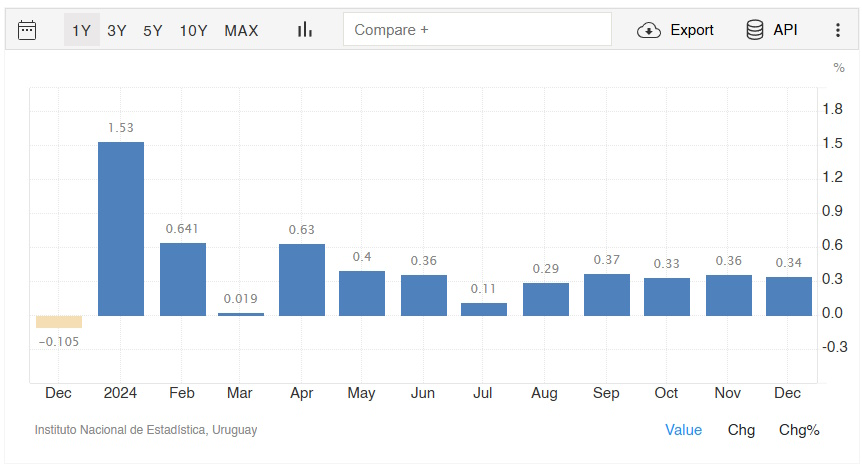